In [1]:
# classe para representar pontos bidimensionais no espaço
class Ponto:
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [2]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree
import numpy as np

# Geração de dados
n = 100
a = np.random.random((n, 2))
b = np.random.random((n, 2))

# função que calcula par de pontos com menor distancia dados dois conjuntos diferentes
def menor_dist(a,b):
    # Construção da árvore KD
    tree = KDTree(a)

    # Consulta de vizinhos mais próximos
    (distances, neighbors) = tree.query(b, k=1)

    # Encontrando o índice do par mais próximo
    min_distance_index = np.argmin(distances)

    # Coordenadas do par mais próximo
    point_a = a[neighbors[min_distance_index]]
    point_b = b[min_distance_index]


    

    print(f"Ponto mais próximo em 'a': {point_a}")
    print(f"Ponto correspondente em 'b': {point_b}")


    # Encontrando os índices dos pontos mais próximos
    indices = neighbors.flatten()

    min_dist = distances.min()

    # Criação do gráfico
    plt.scatter(a[:, 0], a[:, 1], label='Conjunto A', c='blue')
    plt.scatter(b[:, 0], b[:, 1], label='Conjunto B', c='red')
    # Adiciona uma linha entre o par de pontos mais próximo
    plt.plot([point_a[0, 0], point_b[0]], [point_a[0, 1], point_b[1]], 'k--')

   

    plt.title('Pontos e Reta entre Pontos Mais Próximos')
    plt.xlabel('Eixo X')
    plt.ylabel('Eixo Y')
    plt.legend()
    plt.show()

    p1 = Ponto(point_a[0, 0], point_a[0,1])
    p2 = Ponto(point_b[0], point_b[1])
    
    return (p1, p2)

Ponto mais próximo em 'a': [[21.963687   29.41929543]]
Ponto correspondente em 'b': [37.74455151 55.52450554]


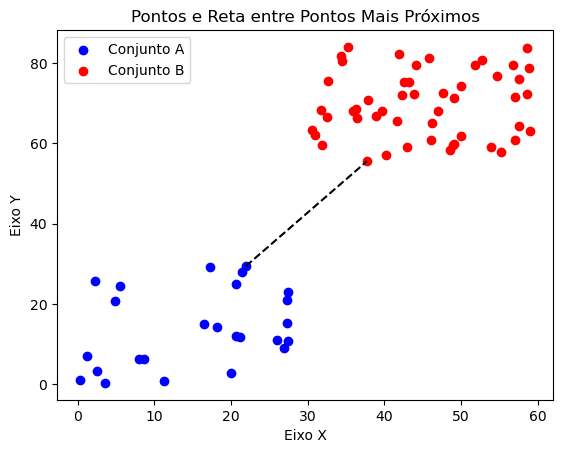

In [10]:

# simulação usando pontos aleatorios
# Geração de dois conjuntos de pontos separados
def generate_separated_sets(n, separation_distance):
    # Conjunto A: pontos gerados aleatoriamente
    set_a = np.random.rand(n//2, 2) * separation_distance

    # Conjunto B: pontos gerados aleatoriamente com uma distância de separação
    set_b = np.random.rand(n, 2) * separation_distance + np.array([separation_distance, 55])

    return set_a, set_b

# Parâmetros
n_pontos = 50
distancia_separacao = 30.0

# Geração dos conjuntos
conjunto_a, conjunto_b = generate_separated_sets(n_pontos, distancia_separacao)

# pega pontos com menor dist
p1, p2 = menor_dist(conjunto_a,conjunto_b)


#### Para qualquer equação linear \(y = mx + b\), as perpendiculares terão todas uma inclinação de \(-1/m\), o recíproco oposto da inclinação original. Para encontrar a perpendicular de um segmento dado que também passa por um ponto específico \((x, y)\),  basta resolver a equação \(y = (-1/m)x + b\), substituindo os valores conhecidos de \(m\), \(x\) e \(y\) para resolver \(b\).

In [11]:

# retorna inclinação e ponto onde reta perpendicular cruza o segmento formado por p1p2
def reta_perpendicular(p1, p2):
    inclinacao_original = (p1.y-p2.y)/(p1.x-p2.x)
    
    inclinacao_perpendicular = (-1.0)/inclinacao_original
    
    p = ((p1.x + p2.x)/2, (p1.y + p2.y)/2) # ponto da mediana
    print("mediana %d", p)
    
    b = p[1] - inclinacao_perpendicular * p[0]
    return (b, inclinacao_perpendicular)

# Função para calcular os valores y da reta dada inclinação
def reta(m, b, x):
    return m * x + b

mediana %d (29.85411925246138, 42.471900488969)


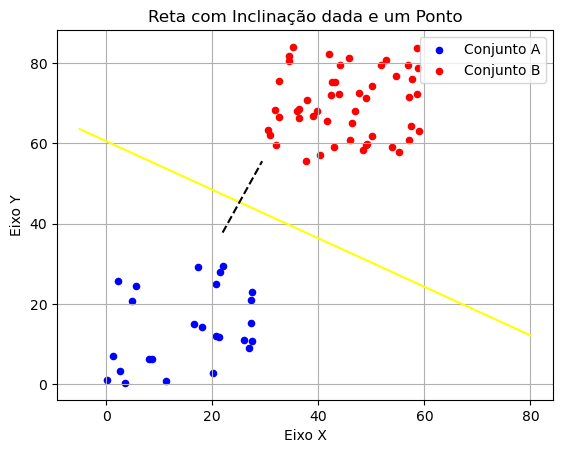

In [12]:
import numpy as np
import matplotlib.pyplot as plt

b, m = reta_perpendicular(p1,p2)

# Gerando valores x para a reta
x_valores = np.linspace(-5, 80, 100)

# Gerando valores y para a reta
y_valores = reta(m, b ,x_valores)

# Criação do gráfico
plt.plot(x_valores, y_valores, color='yellow')
#plt.scatter(ponto, color='red', label='Ponto na Reta')
  # Criação do gráfico
plt.scatter(conjunto_a[:, 0], conjunto_a[:, 1], label='Conjunto A', c='blue', s=20)
plt.scatter(conjunto_b[:, 0], conjunto_b[:, 1], label='Conjunto B', c='red', s=20)
# Adiciona uma linha entre o par de pontos mais próximo
plt.plot((p1.x,p1.y), (p2.x,p2.y), 'k--')

plt.title('Reta com Inclinação dada e um Ponto')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.legend()
plt.grid(True)
plt.show()


In [6]:


class PontoRotulado:
    def __init__(self, x, y, rotulo):
        self.ponto = Ponto(x, y)
        self.rotulo = rotulo

# Lista de objetos contendo ponto e string
lista_de_objetos = [
    PontoRotulado(3, 2, 'Objeto1'),
    PontoRotulado(1, 5, 'Objeto2'),
    PontoRotulado(4, 3, 'Objeto3')
]

# Ordena a lista de objetos com base nas coordenadas x dos pontos
lista_ordenada = sorted(lista_de_objetos, key=lambda obj: obj.ponto.x)

# Imprime a lista ordenada
for obj in lista_ordenada:
    print(f'Coordenada x: {obj.ponto.x}, Rotulo: {obj.rotulo}')


Coordenada x: 1, Rotulo: Objeto2
Coordenada x: 3, Rotulo: Objeto1
Coordenada x: 4, Rotulo: Objeto3


In [25]:
import sys
import math
 
# To find the closest pair of ordenados_x

def closestPair(pontos, n):
    

    # Ordena a lista de objetos com base nas coordenadas x dos pontos
    ordenados_X = sorted(pontos, key=lambda obj: obj.ponto.x)
 

    # Minimum distance b/w ordenados_x seen so far

    d = sys.maxsize
 

    # Keeping the ordenados_x in increasing order

    st = set()

    st.add(ordenados_X[0])
 

    for i in range(1, len(ordenados_X)):
        l = set([p for p in st if p.ponto.x >= ordenados_X[i].ponto.x - d and p.ponto.y >= ordenados_X[i].ponto.y - d ])
        r = set([p for p in st if p.ponto.x <= ordenados_X[i].ponto.x + d and p.ponto.y <= ordenados_X[i].ponto.y + d])
        intersection = l & r

        if len(intersection) == 0:
            continue

        # Loop sobre a interseção dos conjuntos l e r
        for val in intersection:
            if ordenados_X[i].rotulo == val.rotulo:
                continue
            # Calcula a distância entre os pontos
            dis = math.sqrt(math.pow(ordenados_X[i].ponto.x - val.ponto.x, 2) + math.pow(ordenados_X[i].ponto.y - val.ponto.y, 2))

            # Atualiza a distância mínima, se necessário
            if d > dis:
                d = dis
                p1 = ordenados_X[i]
                p2 = val

 

        st.add(ordenados_X[i])
 
    print("The smallest distance is", d)
    print("Os pontos sao:", {p1.ponto.x},{p1.ponto.y},{p2.ponto.x}, {p1.ponto.y})
    return p1, p2
 


lista_de_objetos = [
    PontoRotulado(3, 2, 1),
    PontoRotulado(1, 5, 0),
    PontoRotulado(4, 3, 1),
    PontoRotulado(5, 8, 0),
    PontoRotulado(2, 6, 1),
    PontoRotulado(7, 1, 0),
    PontoRotulado(9, 4, 1),
    PontoRotulado(6, 7, 0),
    PontoRotulado(8, 9, 1),
    PontoRotulado(10, 12, 0),
    PontoRotulado(11, 14, 1),
    PontoRotulado(13, 10, 0),
    PontoRotulado(15, 11, 1),
    PontoRotulado(14, 13, 0),
    PontoRotulado(16, 15, 1)
]

# I

n = len(lista_de_objetos)
 
# Function call

p3, p4 = closestPair(lista_de_objetos, n)

P3 = Ponto(p3.ponto.x, p3.ponto.y)
P4 = Ponto(p4.ponto.x, p4.ponto.y)

The smallest distance is 1.4142135623730951
Os pontos sao: {2} {6} {1} {6}


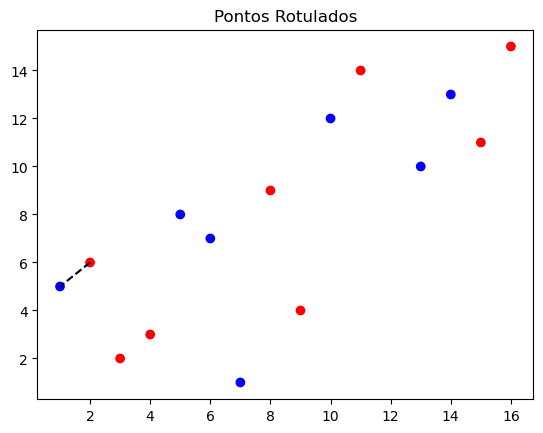

In [28]:
# Cores associadas a cada rótulo
cores = {0: 'blue', 1: 'red'}

# Criando listas de coordenadas e cores
coordenadas_x = [obj.ponto.x for obj in lista_de_objetos]
coordenadas_y = [obj.ponto.y for obj in lista_de_objetos]
cores_pontos = [cores[obj.rotulo] for obj in lista_de_objetos]

# Plotando os pontos com cores diferentes
plt.scatter(coordenadas_x, coordenadas_y, c=cores_pontos)
# Adiciona uma linha entre o par de pontos mais próximo
plt.plot([P3.x,P4.x], [P3.y,P4.y], 'k--')

# Adicionando legendas e título
plt.title('Pontos Rotulados')

# Exibindo o gráfico
plt.show()